In [1]:
import numpy as np
import random
from scipy import linalg as la
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker 

In [2]:
from sghmc.module import sghmc,sghmc_chains

# Mixture Normal

In [3]:
mu = np.array([-3, 3]).reshape(2,1) # true value for mu
n = 200 # number of observations
y = np.r_[np.random.normal(mu[0], 1, n),np.random.normal(mu[1], 1, n)]

In [4]:
def mn_glpdf(y,mu):
    exp1=np.exp(-0.5*(y-mu[0])**2)
    exp2=np.exp(-0.5*(y-mu[1])**2)
    
    v = np.c_[exp1*(y-mu[0]),exp2*(y-mu[1])]
    return np.sum(v/(exp1+exp2),axis=0)

def mn_glpr(mu):
    return -(np.sum(mu)/100)

In [5]:
%%time
sim1 = sghmc(mn_glpdf, mn_glpr, y[:,None], V_hat = np.eye(2), eps = 0.01, 
            theta_0 = np.array([0,0]), C = np.eye(2), 
            heatup = 100, epoches = 200, batch_size = 80)


CPU times: user 105 ms, sys: 4.36 ms, total: 109 ms
Wall time: 108 ms


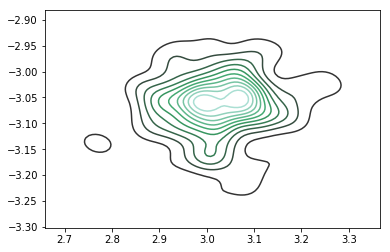

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

kdeplt2 = sns.kdeplot(sim1[:,0],sim1[:,1])  
plt.show()

In [7]:
%%time
sim2 = sghmc_chains(mn_glpdf, mn_glpr, y[:,None], V_hat = np.eye(2), eps = 0.01, 
            theta_0 = np.array([0,0]), C = np.eye(2), 
            heatup = 100, epoches = 200, batch_size = 80,chain = 20)
sim2 = np.r_[tuple([asim for asim in sim2])]

CPU times: user 34.8 ms, sys: 72.2 ms, total: 107 ms
Wall time: 518 ms


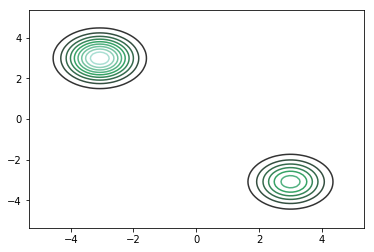

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

kdeplt2 = sns.kdeplot(sim2[:,0],sim2[:,1])  
plt.show()